C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3751 - loss: 1.9949 - val_accuracy: 0.7966 - val_loss: 1.1000
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8093 - loss: 0.9806 - val_accuracy: 0.8597 - val_loss: 0.6734
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8553 - loss: 0.6521 - val_accuracy: 0.8801 - val_loss: 0.5214
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8757 - loss: 0.5190 - val_accuracy: 0.8919 - val_loss: 0.4492
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8830 - loss: 0.4598 - val_accuracy: 0.9001 - val_loss: 0.4062
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8926 - loss: 0.4149 - val_accuracy: 0.9041 - val_loss: 0.3774
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8988 - loss: 0.3877 - val_accuracy: 0.9088 - val_loss: 0.3566
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9006 - loss: 0

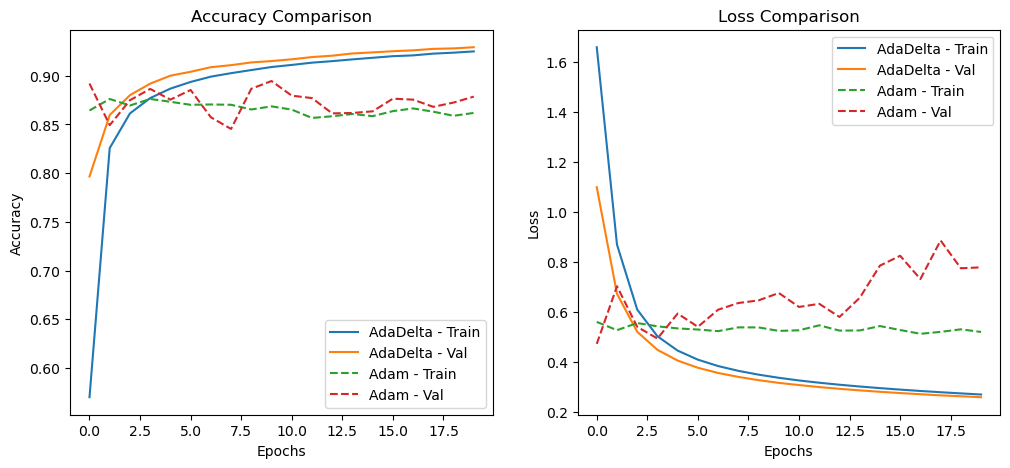

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adadelta, Adam

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (scaling between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to create the model
def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Convert 28x28 image to 1D (784 inputs)
        Dense(128, activation='relu'),  # Hidden layer with 128 neurons (ReLU activation)
        Dense(10, activation='softmax') # Output layer with 10 neurons (softmax for classification)
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model with AdaDelta optimizer (learning rate 0.01)
adadelta_optimizer = Adadelta(learning_rate=0.01)
model_adadelta = create_model(adadelta_optimizer)
history_adadelta = model_adadelta.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

# Train model with Adam optimizer (learning rate 0.05)
adam_optimizer = Adam(learning_rate=0.05)
model_adam = create_model(adam_optimizer)
history_adam = model_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

# Function to plot accuracy and loss comparison
def plot_optimizer_comparison(history_adadelta, history_adam):
    plt.figure(figsize=(12, 5))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_adadelta.history['accuracy'], label='AdaDelta - Train')
    plt.plot(history_adadelta.history['val_accuracy'], label='AdaDelta - Val')
    plt.plot(history_adam.history['accuracy'], label='Adam - Train', linestyle='dashed')
    plt.plot(history_adam.history['val_accuracy'], label='Adam - Val', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Comparison')

    # Loss comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_adadelta.history['loss'], label='AdaDelta - Train')
    plt.plot(history_adadelta.history['val_loss'], label='AdaDelta - Val')
    plt.plot(history_adam.history['loss'], label='Adam - Train', linestyle='dashed')
    plt.plot(history_adam.history['val_loss'], label='Adam - Val', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Comparison')

    plt.show()

# Plot results
plot_optimizer_comparison(history_adadelta, history_adam)
